# **Problem : Identifying Areas for Expansion or Reduction of 5G Towers in Uttrakhand**

In [ ]:
# Import Required Libraries
import numpy as np     # use for numerical computation and array computation
import pandas as pd   # use for fetching the files and analysis
import matplotlib.pyplot as plt  # Use for creating static, animated, and interactive visualizations
import seaborn as sns    # Use for data visualization, built on top of Matplotlib
from sklearn.cluster import KMeans   # Use for clustering analysis
from sklearn.

In [ ]:
# Load the dataset
site_data = pd.read_excel('DPR-UK.xlsx')

In [ ]:
# Display the shape and information of the dataset
print("Dataset Shape:", site_data.shape)
site_data.info()

Dataset Shape: (1127, 147)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1127 entries, 0 to 1126
Columns: 147 entries, S. No. to Cluster ID
dtypes: datetime64[ns](60), float64(41), int64(1), object(45)
memory usage: 1.3+ MB


In [ ]:
# Verify column names
print("Available Columns:", site_data.columns)

Available Columns: Index(['S. No.', 'State', 'DHQ', 'City', 'Zone', 'MP', 'Priority Launch Scope',
       'SiteID', 'Site Name', 'Lat',
       ...
       'JMS approval received for invoicing date', 'Invoicing done date',
       'ATP 11A Approval Category', 'WCC ( 11A , 11B & 12 A Done ) Date',
       'HW NS Date', 'Project Type', 'BTN Cases', 'Remarks', '4432 RRH Sites',
       'Cluster ID'],
      dtype='object', length=147)


In [ ]:
print(site_data.columns)

Index(['S. No.', 'State', 'DHQ', 'City', 'Zone', 'MP', 'Priority Launch Scope',
       'SiteID', 'Site Name', 'Lat',
       ...
       'JMS approval received for invoicing date', 'Invoicing done date',
       'ATP 11A Approval Category', 'WCC ( 11A , 11B & 12 A Done ) Date',
       'HW NS Date', 'Project Type', 'BTN Cases', 'Remarks', '4432 RRH Sites',
       'Cluster ID'],
      dtype='object', length=147)


In [ ]:
# Select relevant columns (adjust names to match your dataset)
selected_columns = ['Lat', 'Long', 'Tower Type']
df_selected = site_data[selected_columns]

In [ ]:
# Check and handle missing values
print("\nMissing values before dropping:")
print(df_selected.isnull().sum())

df_selected_cleaned = df_selected.dropna()

print("\nMissing values after dropping:")
print(df_selected_cleaned.isnull().sum())


Missing values before dropping:
Lat            65
Long           65
Tower Type    256
dtype: int64

Missing values after dropping:
Lat           0
Long          0
Tower Type    0
dtype: int64


In [ ]:
# Verify number of rows before and after dropping missing values
print("\nRows before dropping missing values:", len(df_selected))
print("Rows after dropping missing values:", len(df_selected_cleaned))


Rows before dropping missing values: 1127
Rows after dropping missing values: 870


In [ ]:
# Convert categorical data to numerical using one-hot encoding
df_processed = pd.get_dummies(df_selected_cleaned, drop_first=True)
# get_dummies is a function in pandas library which is used for categorical data into numerical data

# Ensure no missing values remain
df_processed.fillna(df_processed.mean(), inplace=True)

In [ ]:
# Standardize the data using Z-score normalization

# StandardScaler is a class from the sklearn.preprocessing module in the scikit-learn library
# It is  designed to perform Z-score normalization on data.

scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_processed)

In [ ]:
# Apply K-Means clustering
kmeans = KMeans(n_clusters=10, random_state=42, n_init=10)
kmeans.fit(scaled_data)

KMeans(n_clusters=10, n_init=10, random_state=42)

In [ ]:
# Add cluster labels to the original dataset
site_data['Cluster'] = np.nan
site_data.loc[df_selected_cleaned.index, 'Cluster'] = kmeans.labels_

# Save the updated dataset to a new Excel file
output_columns = selected_columns + ['Cluster']
site_data[output_columns].to_excel('DPR-UK_with_clusters.xlsx', index=False)

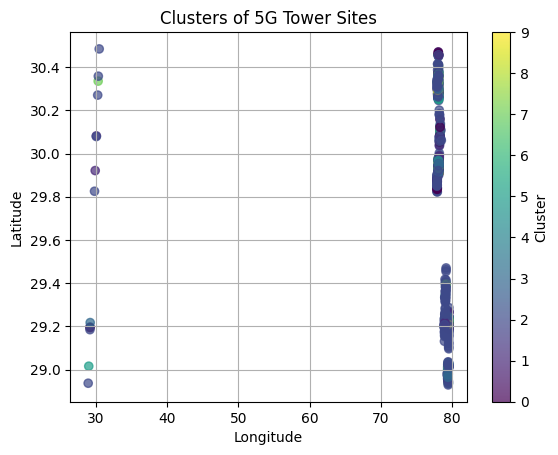

In [ ]:
# Scatter plot to visualize clusters
plt.scatter(site_data['Long'], site_data['Lat'], c=site_data['Cluster'], cmap='viridis', alpha=0.7)
plt.colorbar(label='Cluster')
plt.title('Clusters of 5G Tower Sites')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.show()

In [ ]:
# Calculate and visualize cluster centers
cluster_centers = scaler.inverse_transform(kmeans.cluster_centers_)
lat_long_centers = pd.DataFrame(cluster_centers, columns=df_processed.columns)

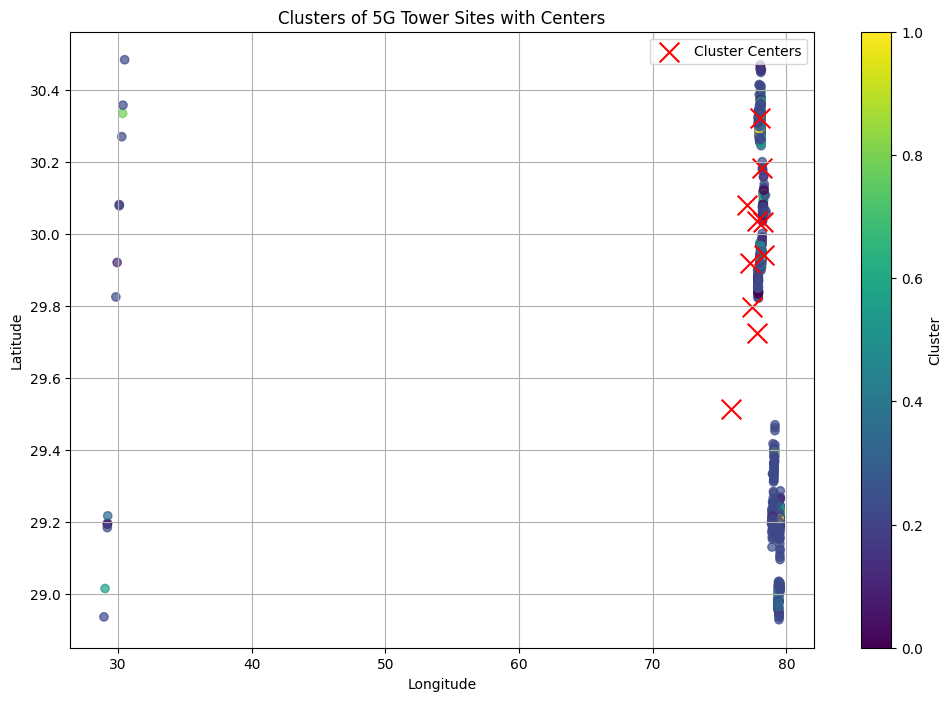

In [ ]:
# Plot the cluster centers
plt.figure(figsize=(12, 8))
plt.scatter(site_data['Long'], site_data['Lat'], c=site_data['Cluster'], cmap='viridis', alpha=0.7)
plt.scatter(lat_long_centers['Long'], lat_long_centers['Lat'], color='red', marker='x', s=200, label='Cluster Centers')
plt.colorbar(label='Cluster')
plt.title('Clusters of 5G Tower Sites with Centers')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Save the cluster centers to an Excel file
lat_long_centers.to_excel('Cluster_Centers.xlsx', index=False)

In [ ]:
# Cluster summary
cluster_summary = site_data.groupby('Cluster')[['Lat', 'Long']].mean()
print("\nCluster Summary:")
print(cluster_summary)


Cluster Summary:
               Lat       Long
Cluster                      
0.0      30.081333  77.053638
1.0      29.798166  77.436414
2.0      29.725475  77.809853
3.0      30.037168  77.765600
4.0      30.034733  78.223834
5.0      29.514669  75.884114
6.0      30.184256  78.195949
7.0      29.920987  77.260266
8.0      30.322061  78.040283
9.0      29.942492  78.307804


In [ ]:
# Detailed profiling
cluster_summary = site_data.groupby('Cluster').agg({
    'Lat': ['mean', 'std', 'count'],
    'Long': ['mean', 'std'],
    'Tower Type': lambda x: x.mode()[0] if not x.mode().empty else 'Unknown'
}).reset_index()

In [ ]:
# Rename columns for clarity
cluster_summary.columns = ['Cluster', 'Mean Latitude', 'Latitude StdDev', 'Number of Sites',
                           'Mean Longitude', 'Longitude StdDev', 'Dominant Tower Type']

# Display the summary of each cluster
print("\nDetailed Cluster Summary:")
print(cluster_summary)

# Save cluster profiling to an Excel file
cluster_summary.to_excel('Cluster_Profile_Summary.xlsx', index=False)


Detailed Cluster Summary:
   Cluster  Mean Latitude  Latitude StdDev  Number of Sites  Mean Longitude  \
0      0.0      30.081333         0.383151               43       77.053638   
1      1.0      29.798166         0.488816               94       77.436414   
2      2.0      29.725475         0.524412              487       77.809853   
3      3.0      30.037168         0.461830               99       77.765600   
4      4.0      30.034733         0.386181               29       78.223834   
5      5.0      29.514669         0.541827               17       75.884114   
6      6.0      30.184256         0.352808               35       78.195949   
7      7.0      29.920987         0.505919               41       77.260266   
8      8.0      30.322061         0.027816                9       78.040283   
9      9.0      29.942492         0.475572               16       78.307804   

   Longitude StdDev Dominant Tower Type  
0          7.484911             Old NBT  
1          7.055611

<ipython-input-22-17dbebea7e8e>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=site_data, x='Cluster', y='Lat', ax=axes[0], palette='Set2')
<ipython-input-22-17dbebea7e8e>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=site_data, x='Cluster', y='Long', ax=axes[1], palette='Set3')


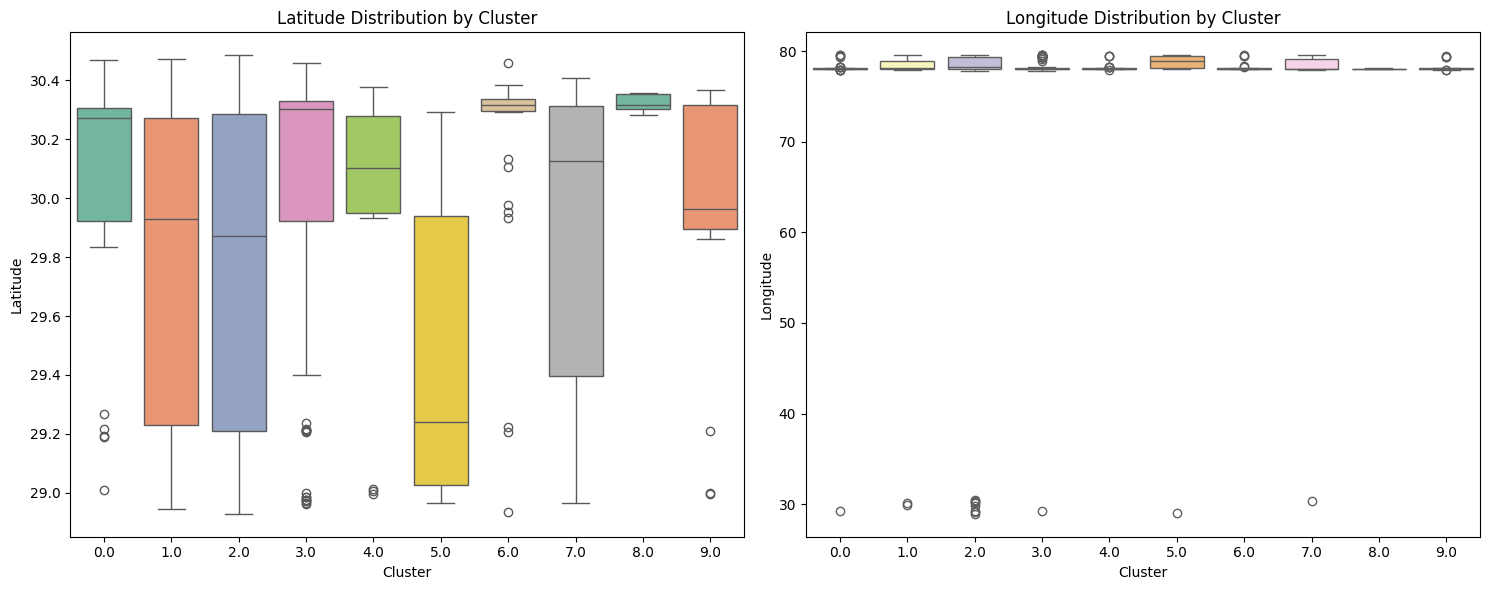

In [ ]:
# Box plots for visualizing cluster distributions
fig, axes = plt.subplots(1, 2, figsize=(15, 6))
sns.boxplot(data=site_data, x='Cluster', y='Lat', ax=axes[0], palette='Set2')
axes[0].set_title('Latitude Distribution by Cluster')
axes[0].set_xlabel('Cluster')
axes[0].set_ylabel('Latitude')

sns.boxplot(data=site_data, x='Cluster', y='Long', ax=axes[1], palette='Set3')
axes[1].set_title('Longitude Distribution by Cluster')
axes[1].set_xlabel('Cluster')
axes[1].set_ylabel('Longitude')

plt.tight_layout()
plt.show()

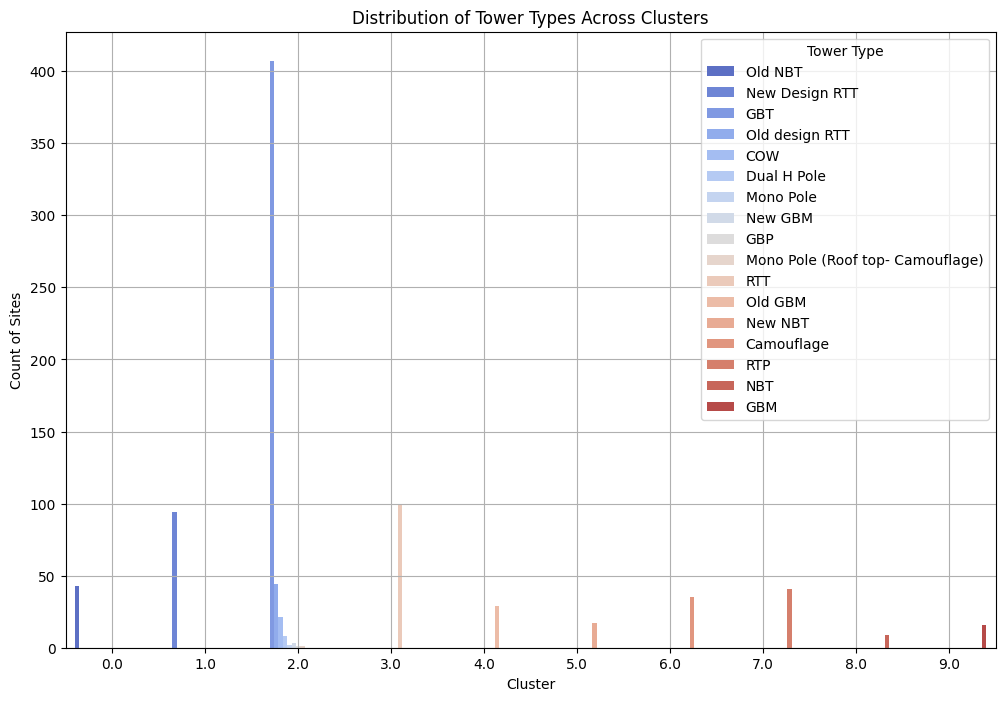

In [ ]:
# Tower Type Distribution within Clusters
plt.figure(figsize=(12, 8))
sns.countplot(data=site_data, x='Cluster', hue='Tower Type', palette='coolwarm')
plt.title('Distribution of Tower Types Across Clusters')
plt.xlabel('Cluster')
plt.ylabel('Count of Sites')
plt.legend(title='Tower Type')
plt.grid(True)
plt.show()

In [ ]:
#Conclusion

# Generate recommendations for expansion or reduction
def analyze_expansion_reduction(cluster_summary):
    high_density_threshold = 250
    low_density_threshold = 50
    recommendations = []

    for idx, row in cluster_summary.iterrows():
        cluster_id = row['Cluster']
        num_sites = row['Number of Sites']
        dominant_tower = row['Dominant Tower Type']

        if num_sites < low_density_threshold:
            recommendations.append(
                f"Cluster {cluster_id}: Low number of sites ({num_sites}). Consider expanding with more {dominant_tower} towers."
            )
        elif num_sites > high_density_threshold:
            recommendations.append(
                f"Cluster {cluster_id}: High number of sites ({num_sites}). Evaluate for potential tower reduction."
            )
        else:
            recommendations.append(
                f"Cluster {cluster_id}: Moderate density ({num_sites} sites). No immediate action required."
            )
    return recommendations

recommendations = analyze_expansion_reduction(cluster_summary)
print("\nRecommendations for Expansion/Reduction:")
for rec in recommendations:
    print(rec)


Recommendations for Expansion/Reduction:
Cluster 0.0: Low number of sites (43). Consider expanding with more Old NBT towers.
Cluster 1.0: Moderate density (94 sites). No immediate action required.
Cluster 2.0: High number of sites (487). Evaluate for potential tower reduction.
Cluster 3.0: Moderate density (99 sites). No immediate action required.
Cluster 4.0: Low number of sites (29). Consider expanding with more Old GBM towers.
Cluster 5.0: Low number of sites (17). Consider expanding with more New NBT towers.
Cluster 6.0: Low number of sites (35). Consider expanding with more Camouflage towers.
Cluster 7.0: Low number of sites (41). Consider expanding with more RTP towers.
Cluster 8.0: Low number of sites (9). Consider expanding with more NBT towers.
Cluster 9.0: Low number of sites (16). Consider expanding with more GBM towers.
